# Importing Libraries

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar

In [121]:
supermart = pd.read_csv('Supermart_sales.csv')

In [122]:
supermart.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [123]:
rename_column = {'Order ID':'order_id', 'Customer Name':'customer_name', 'Category':'category', 'Sub Category':'sub_category',
                'City':'city', 'Order Date':'order_date', 'Region':'region', 'Sales':'sales_price', 'Discount':'discount',
                'Profit':'profit', 'State':'state'}
supermart = supermart.rename(columns = rename_column)

In [124]:
supermart.tail()

,order_id,customer_name,category,sub_category,city,order_date,region,sales_price,discount,profit,state
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [125]:
supermart.describe()

,sales_price,discount,profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [126]:
supermart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_name  9994 non-null   object 
 2   category       9994 non-null   object 
 3   sub_category   9994 non-null   object 
 4   city           9994 non-null   object 
 5   order_date     9994 non-null   object 
 6   region         9994 non-null   object 
 7   sales_price    9994 non-null   int64  
 8   discount       9994 non-null   float64
 9   profit         9994 non-null   float64
 10  state          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [127]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
supermart['category']= label_encoder.fit_transform(supermart['category'])
supermart['sub_category']= label_encoder.fit_transform(supermart['sub_category'])
supermart['city']= label_encoder.fit_transform(supermart['city'])
supermart['region']= label_encoder.fit_transform(supermart['region'])
supermart['customer_name']= label_encoder.fit_transform(supermart['customer_name'])

In [128]:
supermart.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales_price,discount,profit,state
0,OD1,12,5,14,21,11-08-2017,2,1254,0.12,401.28,Tamil Nadu
1,OD2,37,1,13,8,11-08-2017,3,749,0.18,149.80,Tamil Nadu
2,OD3,14,3,0,13,06-12-2017,4,2360,0.21,165.20,Tamil Nadu
3,OD4,15,4,12,4,10-11-2016,3,896,0.25,89.60,Tamil Nadu
4,OD5,28,3,18,12,10-11-2016,3,2355,0.26,918.45,Tamil Nadu


In [129]:
supermart['order_date'] = pd.to_datetime(supermart['order_date'])

In [130]:
supermart['month_name'] = [calendar.month_abbr[num] for num in supermart['order_date'].dt.month]
supermart['month'] = supermart['order_date'].dt.month
supermart['year'] = supermart['order_date'].dt.year

In [131]:
supermart.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales_price,discount,profit,state,month_name,month,year
0,OD1,12,5,14,21,2017-11-08,2,1254,0.12,401.28,Tamil Nadu,Nov,11,2017
1,OD2,37,1,13,8,2017-11-08,3,749,0.18,149.80,Tamil Nadu,Nov,11,2017
2,OD3,14,3,0,13,2017-06-12,4,2360,0.21,165.20,Tamil Nadu,Jun,6,2017
3,OD4,15,4,12,4,2016-10-11,3,896,0.25,89.60,Tamil Nadu,Oct,10,2016
4,OD5,28,3,18,12,2016-10-11,3,2355,0.26,918.45,Tamil Nadu,Oct,10,2016


In [132]:
supermart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   customer_name  9994 non-null   int64         
 2   category       9994 non-null   int64         
 3   sub_category   9994 non-null   int64         
 4   city           9994 non-null   int64         
 5   order_date     9994 non-null   datetime64[ns]
 6   region         9994 non-null   int64         
 7   sales_price    9994 non-null   int64         
 8   discount       9994 non-null   float64       
 9   profit         9994 non-null   float64       
 10  state          9994 non-null   object        
 11  month_name     9994 non-null   object        
 12  month          9994 non-null   int64         
 13  year           9994 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(3)
memory usage: 1.1+

In [133]:
supermart.isnull().sum()

order_id         0
customer_name    0
category         0
sub_category     0
city             0
order_date       0
region           0
sales_price      0
discount         0
profit           0
state            0
month_name       0
month            0
year             0
dtype: int64

# Linear Regression

In [134]:
X = supermart.iloc[:,[7,9]].values
y = supermart.iloc[:,9].values

In [135]:
X[1:5]

array([[ 749.  ,  149.8 ],
       [2360.  ,  165.2 ],
       [ 896.  ,   89.6 ],
       [2355.  ,  918.45]])

In [136]:
y[1:5]

array([149.8 , 165.2 ,  89.6 , 918.45])

# Splitting the Dataset

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

# Fitting the Regression Model

In [138]:
#Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)   

LinearRegression()

In [139]:
print(regressor.intercept_)

2.8421709430404007e-13


In [140]:
print(regressor.coef_)

[7.0473227e-17 1.0000000e+00]


# Predicting the Test Set Results

In [141]:
y_pred = regressor.predict(X_test)

In [142]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' :y_pred})
df

,Actual,Predicted
0,122.00,122.00
1,547.84,547.84
2,64.20,64.20
3,585.22,585.22
4,621.60,621.60
...,...,...
1994,157.51,157.51
1995,430.92,430.92
1996,490.59,490.59
1997,381.34,381.34


In [143]:
from sklearn import metrics
print('Mean squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean squared Error:', np.sqrt( metrics.mean_squared_error(y_test, y_pred)))
print('Mean absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R squared:', metrics.r2_score(y_test, y_pred))

Mean squared Error: 6.043507040729146e-26
Root Mean squared Error: 2.458354539265878e-13
Mean absolute Error: 2.260531820648685e-13
R squared: 1.0


# **Decision Tree algorithm**

In [144]:
supermart.shape

(9994, 14)

In [145]:
supermart.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales_price,discount,profit,state,month_name,month,year
0,OD1,12,5,14,21,2017-11-08,2,1254,0.12,401.28,Tamil Nadu,Nov,11,2017
1,OD2,37,1,13,8,2017-11-08,3,749,0.18,149.80,Tamil Nadu,Nov,11,2017
2,OD3,14,3,0,13,2017-06-12,4,2360,0.21,165.20,Tamil Nadu,Jun,6,2017
3,OD4,15,4,12,4,2016-10-11,3,896,0.25,89.60,Tamil Nadu,Oct,10,2016
4,OD5,28,3,18,12,2016-10-11,3,2355,0.26,918.45,Tamil Nadu,Oct,10,2016


In [146]:
supermart['profit'] = supermart['profit'].astype(int)
supermart['customer_name'] = supermart['customer_name'].astype(str)


In [147]:
supermart.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales_price,discount,profit,state,month_name,month,year
0,OD1,12,5,14,21,2017-11-08,2,1254,0.12,401,Tamil Nadu,Nov,11,2017
1,OD2,37,1,13,8,2017-11-08,3,749,0.18,149,Tamil Nadu,Nov,11,2017
2,OD3,14,3,0,13,2017-06-12,4,2360,0.21,165,Tamil Nadu,Jun,6,2017
3,OD4,15,4,12,4,2016-10-11,3,896,0.25,89,Tamil Nadu,Oct,10,2016
4,OD5,28,3,18,12,2016-10-11,3,2355,0.26,918,Tamil Nadu,Oct,10,2016


In [148]:
X = supermart.iloc[:,[7,9]].values
y = supermart.iloc[:,9].values

In [149]:
X,y

(array([[1254,  401],
        [ 749,  149],
        [2360,  165],
        ...,
        [1567,  501],
        [1659,  597],
        [1034,  165]]), array([401, 149, 165, ..., 501, 597, 165]))

## **Splitting the Dataset**

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.3, random_state=101)

In [151]:
X_train, X_test, y_train, y_test

(array([[ 774,  216],
        [1264,  176],
        [ 935,  420],
        ...,
        [1412,  254],
        [2115,  803],
        [ 669,  140]]), array([[1760,  334],
        [ 715,  128],
        [1859,  446],
        ...,
        [2375,  332],
        [ 555,   94],
        [ 558,  189]]), array([216, 176, 420, ..., 254, 803, 140]), array([334, 128, 446, ..., 332,  94, 189]))

# Fitting the Classification Model

In [152]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [153]:
X_train = sc.fit_transform(X_train)

In [154]:
X_test = sc.transform(X_test)

In [155]:
X_test

array([[ 0.44498706, -0.17081911],
       [-1.36256012, -1.03463805],
       [ 0.61622837,  0.29883003],
       ...,
       [ 1.50875884, -0.1792057 ],
       [-1.63931376, -1.17721011],
       [-1.63412463, -0.778847  ]])

In [156]:
X_train.shape

(6995, 2)

In [157]:
print(X_train.shape)

(6995, 2)


In [158]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Predicting the Test Set Result

In [159]:
y_pred = clf.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [161]:
from sklearn import metrics

In [162]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9729909969989997


In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          25       1.00      1.00      1.00         1
          26       0.00      0.00      0.00         1
          27       0.50      1.00      0.67         1
          29       1.00      1.00      1.00         2
          30       1.00      1.00      1.00         1
          31       1.00      1.00      1.00         2
          32       0.00      0.00      0.00         1
          33       0.67      1.00      0.80         2
          34       1.00      1.00      1.00         2
          35       1.00      1.00      1.00         4
          36       1.00      1.00      1.00         4
          37       1.00      1.00      1.00         2
          39       1.00      1.00      1.00         2
          40       1.00      1.00      1.00         2
          41       1.00      1.00      1.00         6
          42       1.00      1.00      1.00         2
          43       1.00      1.00      1.00         4
          44       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

# Figure of the Decision Tree 

In [164]:
from sklearn import tree

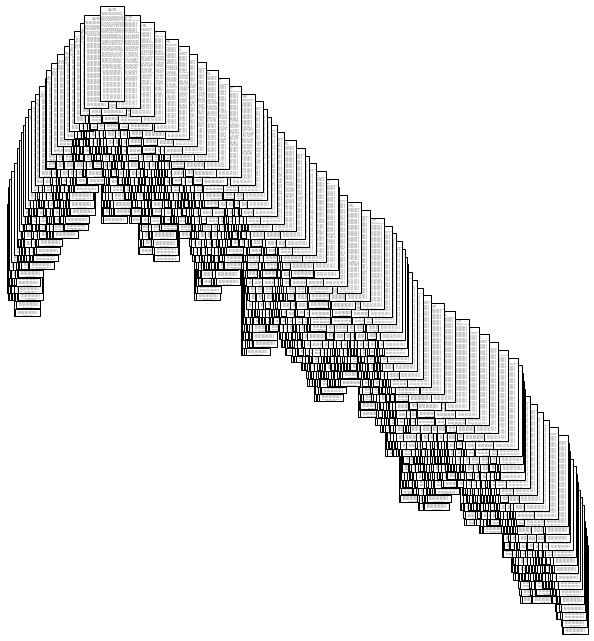

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
tree.plot_tree(clf)
plt.show()

# **Random Forest Algorithm**

# Importing the Libraries


In [166]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier



In [167]:
supermart.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales_price,discount,profit,state,month_name,month,year
0,OD1,12,5,14,21,2017-11-08,2,1254,0.12,401,Tamil Nadu,Nov,11,2017
1,OD2,37,1,13,8,2017-11-08,3,749,0.18,149,Tamil Nadu,Nov,11,2017
2,OD3,14,3,0,13,2017-06-12,4,2360,0.21,165,Tamil Nadu,Jun,6,2017
3,OD4,15,4,12,4,2016-10-11,3,896,0.25,89,Tamil Nadu,Oct,10,2016
4,OD5,28,3,18,12,2016-10-11,3,2355,0.26,918,Tamil Nadu,Oct,10,2016


In [168]:
X = supermart.iloc[:,[7,9]].values
y = supermart.iloc[:,9].values

#Splitting the Dataset


In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [170]:
X_train.shape



(6995, 2)

# Fitting the Classification Model


In [171]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth = 3,
                            max_features= "auto",
                            min_samples_leaf= 4,
                            bootstrap = True,
                            n_jobs = -1,
                            random_state=0)
rf.fit(X_train,y_train)



RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_jobs=-1,
                       random_state=0)

#Predicting the Test Set Result


In [172]:
y_pred = rf.predict(X_test)

In [173]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [174]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [175]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.09203067689229744


In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          25       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         2
          31       0.14      0.50      0.22         2
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         3
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         3
          40       0.00      0.00      0.00         1
          41       0.07      1.00      0.12         1
          42       0.00      0.00      0.00         1
          43       1.00      1.00      1.00         4
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          46       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

# **LOGISTIC REGRESSION**

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
supermart.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales_price,discount,profit,state,month_name,month,year
0,OD1,12,5,14,21,2017-11-08,2,1254,0.12,401,Tamil Nadu,Nov,11,2017
1,OD2,37,1,13,8,2017-11-08,3,749,0.18,149,Tamil Nadu,Nov,11,2017
2,OD3,14,3,0,13,2017-06-12,4,2360,0.21,165,Tamil Nadu,Jun,6,2017
3,OD4,15,4,12,4,2016-10-11,3,896,0.25,89,Tamil Nadu,Oct,10,2016
4,OD5,28,3,18,12,2016-10-11,3,2355,0.26,918,Tamil Nadu,Oct,10,2016


In [179]:
a = supermart.iloc[:,[2,3,4,6]].values
b = supermart.iloc[:,7].values

# Splitting the Dataset


In [180]:
a_train,a_test,b_train,b_test = train_test_split(a ,b, test_size = 0.2, random_state = 0)

# **Fitting the Regression Model**

In [181]:
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

In [182]:
LOG = LogisticRegression()
LOG.fit(a_train,b_train)

LogisticRegression()

#Predicting the Test Set Result

In [183]:
b_pred = LOG.predict(a_test)

In [184]:
print("Accuracy score:", accuracy_score(b_test,b_pred))

Accuracy score: 0.0005002501250625312


In [185]:
print("Confusion Matrix:",confusion_matrix(b_test,b_pred))


Confusion Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [186]:
print("Classification Report:",classification_report(b_test,b_pred))

Classification Report:               precision    recall  f1-score   support

         500       0.00      0.00      0.00         1
         501       0.00      0.00      0.00         4
         504       0.00      0.00      0.00         1
         505       0.00      0.00      0.00         1
         506       0.00      0.00      0.00         4
         507       0.00      0.00      0.00         1
         508       0.00      0.00      0.00         5
         509       0.00      0.00      0.00         2
         510       0.00      0.00      0.00         2
         516       0.00      0.00      0.00         1
         517       0.00      0.00      0.00         1
         520       0.00      0.00      0.00         2
         521       0.00      0.00      0.00         2
         522       0.00      0.00      0.00         3
         523       0.00      0.00      0.00         3
         525       0.00      0.00      0.00         1
         526       0.00      0.00      0.00         2
    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

#**SUPPORT VECTOR MACHINE**

In [187]:
p = supermart.iloc[:,[7,9]].values
q = supermart.iloc[:,9].values

#Importing the Libraries

In [188]:
from sklearn import svm

#Splitting the Dataset

In [189]:
p_train,p_test,q_train,q_test = train_test_split(p,q, test_size = 0.2, random_state = 0)

#Fitting the Classification Model

In [190]:
SVM = svm.SVC(kernel = 'linear')
SVM.fit(p_train,q_train)

SVC(kernel='linear')

#Predicting the Test Set Result

In [191]:
q_pred = SVM.predict(p_test)

In [192]:
print("Accuracy score:", accuracy_score(q_test,q_pred))


Accuracy score: 0.9109554777388694


In [193]:
print("Confusion Matrix:",confusion_matrix(q_test,q_pred))


Confusion Matrix: [[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [194]:
print("Classification Report:",classification_report(q_test,q_pred))

Classification Report:               precision    recall  f1-score   support

          25       1.00      1.00      1.00         3
          27       1.00      1.00      1.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         0
          31       1.00      1.00      1.00         1
          32       1.00      1.00      1.00         1
          35       1.00      1.00      1.00         1
          36       1.00      1.00      1.00         1
          37       1.00      1.00      1.00         1
          39       1.00      1.00      1.00         1
          40       1.00      1.00      1.00         1
          41       1.00      1.00      1.00         1
          42       1.00      1.00      1.00         1
          43       1.00      1.00      1.00         3
          44       1.00      1.00      1.00         1
          45       1.00      1.00      1.00         3
          46       1.00      1.00      1.00         4
    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1